In [18]:
#  pipenv install pandas pyarrow scikit-learn seaborn plotly nbformat pingouin optuna fastapi uvicorn pydantic ipywidgets ipykernel

# EDA
import pandas as pd
import numpy as np
import plotly.express as px
import plotly.graph_objects as go
import seaborn as sns
from pingouin import ttest

# ML
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score, roc_curve, auc, log_loss, confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split

# Otimização de hiperparâmetros
import optuna


### Carregar os Dados

In [19]:
# Carregar dados para o Dataframe
df_fruits = pd.read_csv('./datasets/fruit_quality.csv')

In [20]:
# Visualizar Dataframe
df_fruits.head(10)

,A_id,Size,Weight,Sweetness,Crunchiness,Juiciness,Ripeness,Acidity,Quality
0,0,-3.970049,-2.512336,5.346330,-1.012009,1.844900,0.329840,-0.491590,good
1,1,-1.195217,-2.839257,3.664059,1.588232,0.853286,0.867530,-0.722809,good
2,2,-0.292024,-1.351282,-1.738429,-0.342616,2.838636,-0.038033,2.621636,bad
3,3,-0.657196,-2.271627,1.324874,-0.097875,3.637970,-3.413761,0.790723,good
4,4,1.364217,-1.296612,-0.384658,-0.553006,3.030874,-1.303849,0.501984,good
5,5,-3.425400,-1.409082,-1.913511,-0.555775,-3.853071,1.914616,-2.981523,bad
6,6,1.331606,1.635956,0.875974,-1.677798,3.106344,-1.847417,2.414171,good
7,7,-1.995462,-0.428958,1.530644,-0.742972,0.158834,0.974438,-1.470125,good
8,8,-3.867632,-3.734514,0.986429,-1.207655,2.292873,4.080921,-4.871905,bad
9,9,-0.727983,-0.442820,-4.092223,0.597513,0.393714,1.620857,2.185608,bad


In [21]:
# Visualizar Dataframe
df_fruits.tail(10)

,A_id,Size,Weight,Sweetness,Crunchiness,Juiciness,Ripeness,Acidity,Quality
3990,3990,-1.396794,-0.599596,-1.931104,1.815668,1.670732,1.614027,-0.987968,bad
3991,3991,-4.007762,2.970164,0.218167,-0.492369,1.656375,-2.133895,-4.431321,good
3992,3992,1.764253,-2.079695,-0.083383,-0.086724,-1.703385,3.840101,-0.338261,good
3993,3993,1.520142,-0.352623,-3.206467,1.341719,0.675568,0.107093,-0.945080,bad
3994,3994,1.482508,-2.581181,-0.306888,1.527877,1.056361,2.560829,-1.229255,good
3995,3995,0.059386,-1.067408,-3.714549,0.473052,1.697986,2.244055,0.137784,bad
3996,3996,-0.293118,1.949253,-0.204020,-0.640196,0.024523,-1.087900,1.854235,good
3997,3997,-2.634515,-2.138247,-2.440461,0.657223,2.199709,4.763859,-1.334611,bad
3998,3998,-4.008004,-1.779337,2.366397,-0.200329,2.161435,0.214488,-2.229720,good
3999,3999,0.278540,-1.715505,0.121217,-1.154075,1.266677,-0.776571,1.599796,good


In [22]:
# Estrutura do DataFrame
df_fruits.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   A_id         4000 non-null   int64  
 1   Size         4000 non-null   float64
 2   Weight       4000 non-null   float64
 3   Sweetness    4000 non-null   float64
 4   Crunchiness  4000 non-null   float64
 5   Juiciness    4000 non-null   float64
 6   Ripeness     4000 non-null   float64
 7   Acidity      4000 non-null   float64
 8   Quality      4000 non-null   object 
dtypes: float64(7), int64(1), object(1)
memory usage: 281.4+ KB


### EDA

In [23]:
# Distribuição da Variável Target - Percentual
px.bar(df_fruits.value_counts('Quality') / len(df_fruits) * 100)

In [24]:
# Transformar a variável Quality em numérica (0 e 1)
df_fruits['Quality'] = (df_fruits['Quality'] == 'good').astype(int)

In [25]:
# Remover a coluna A_id, pois não tem poder preditivo
df_fruits.drop(columns=['A_id'], axis=1, inplace=True)

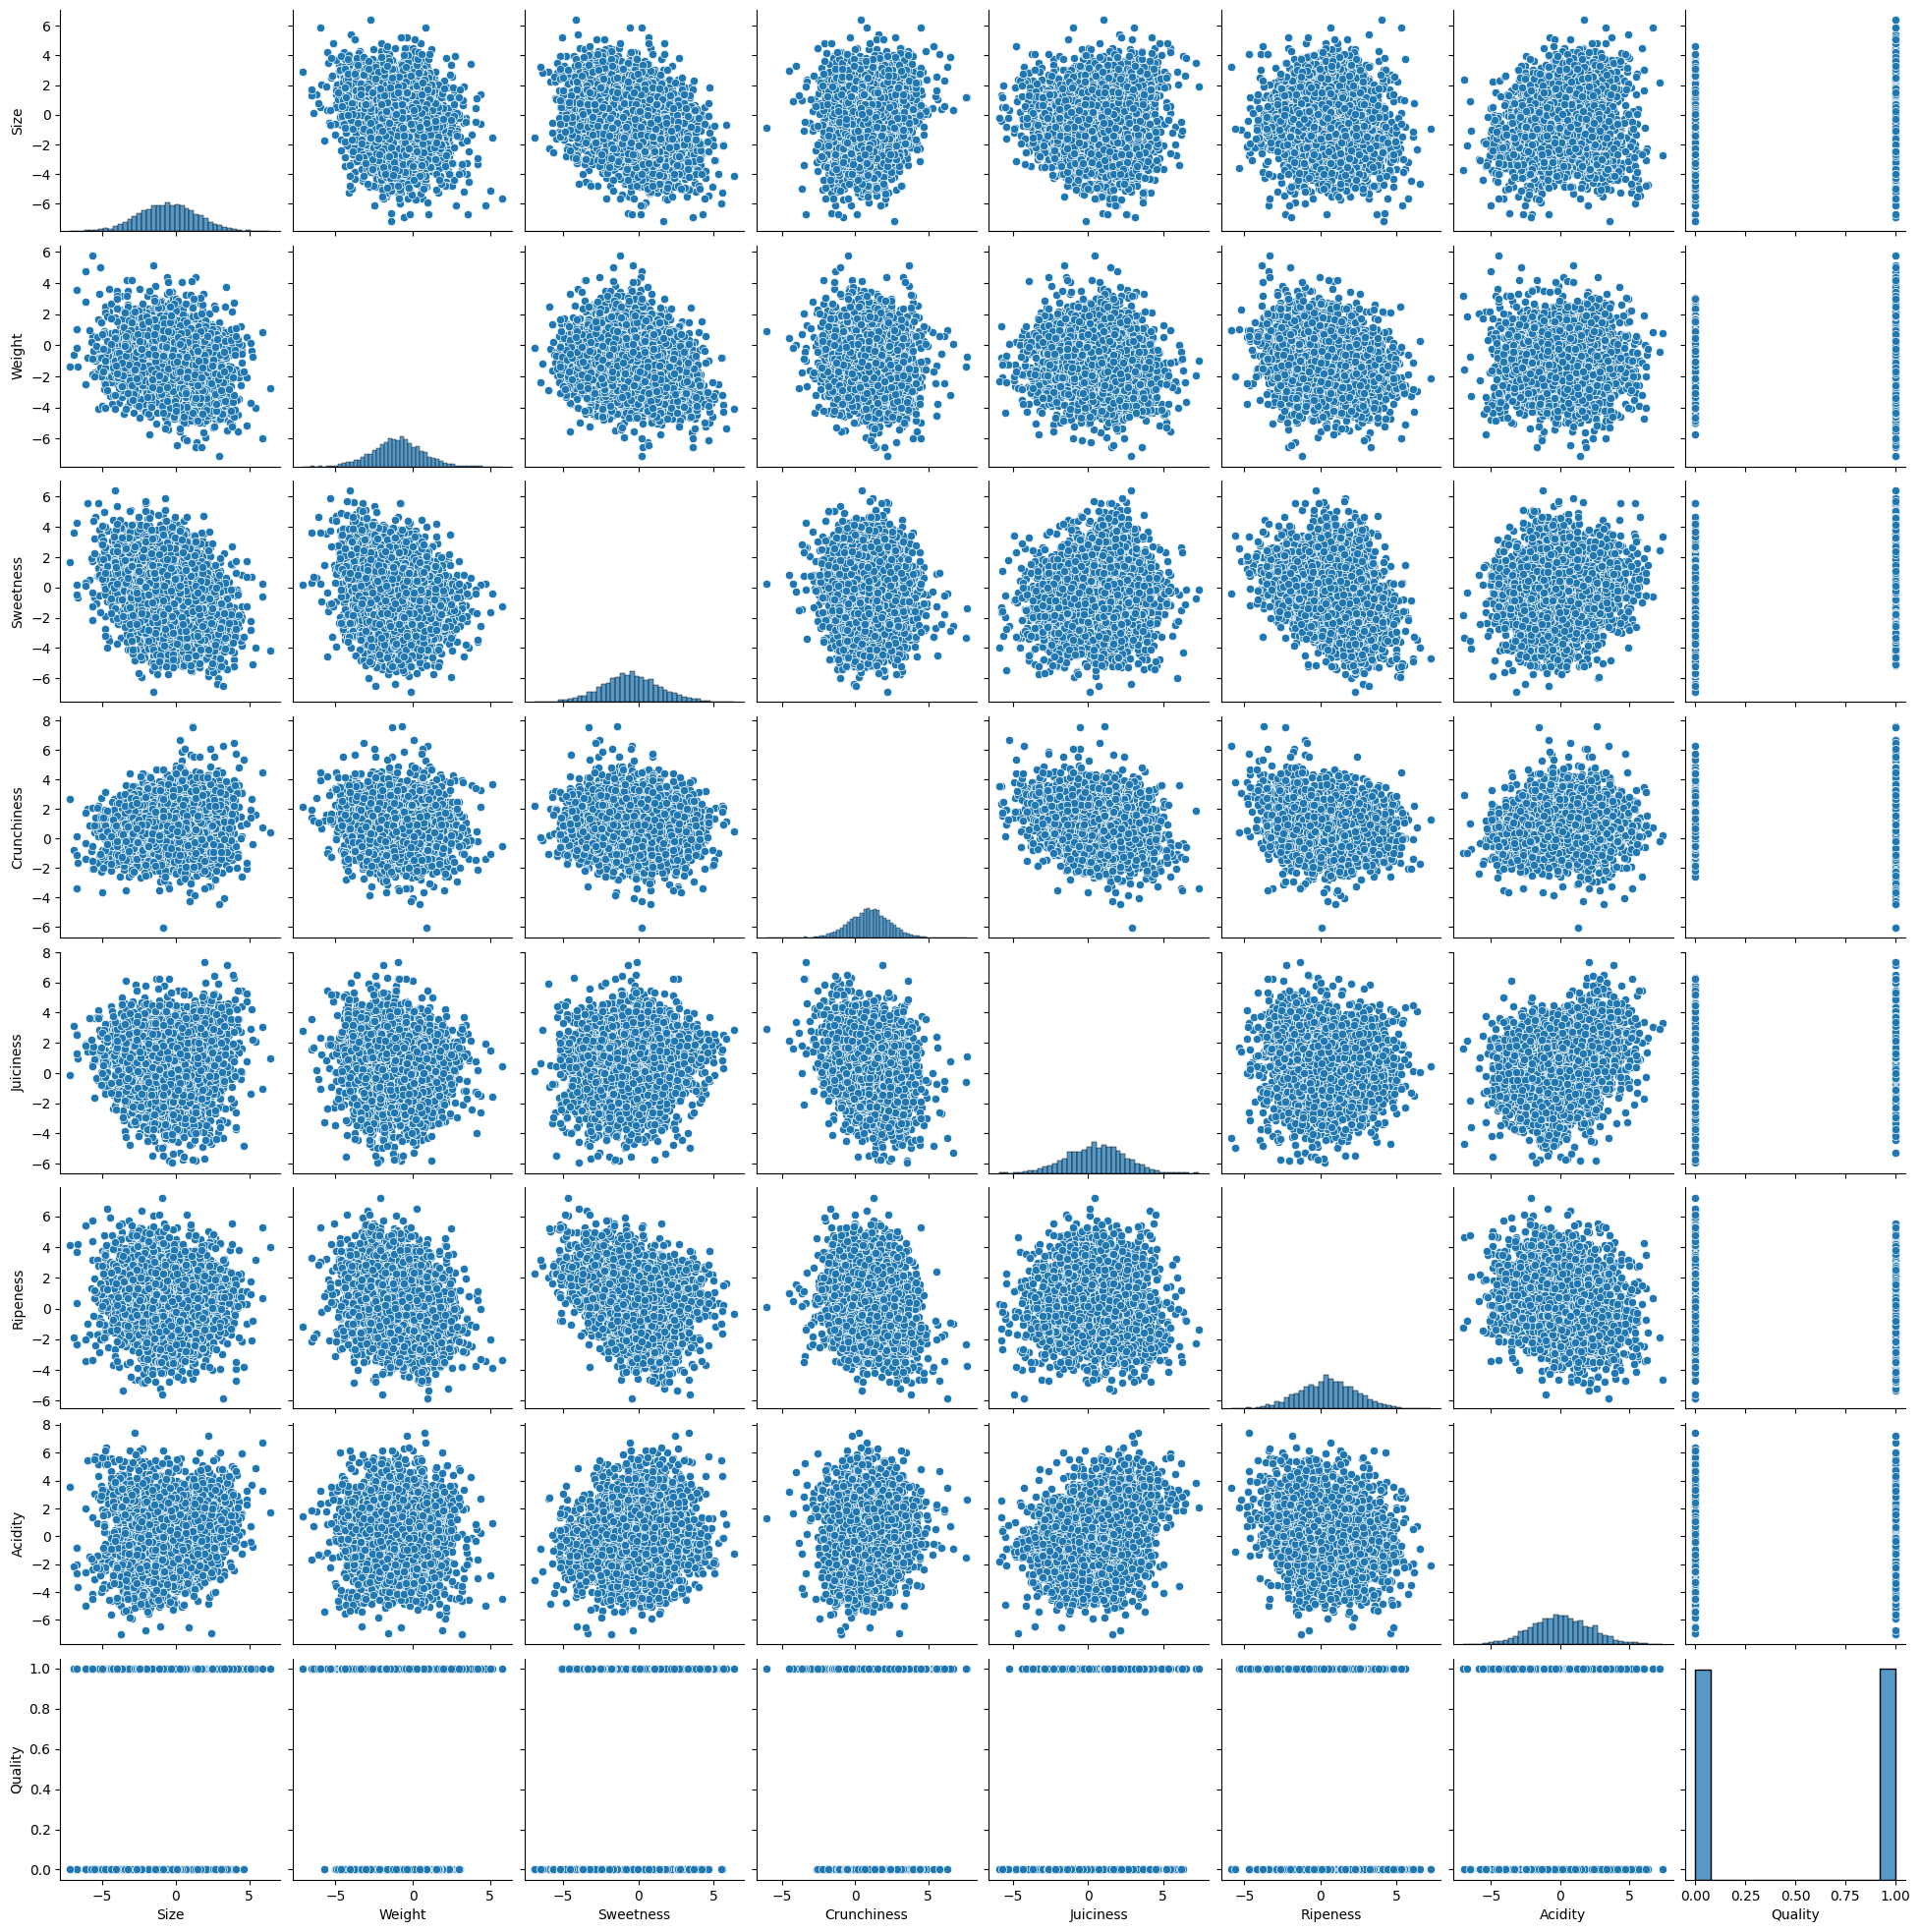

In [26]:
# Verificar a distribuição e a correlação de variáveis numa forma visual
sns.pairplot(df_fruits, diag_kind='hist')

In [27]:
# BoxPlot Quality x Weight
px.box(df_fruits, x='Quality', y='Weight', color='Quality')

In [28]:
# BoxPlot Quality x Sweetness
px.box(df_fruits, x='Quality', y='Sweetness', color='Quality')

In [29]:
# BoxPlot Quality x Size
px.box(df_fruits, x='Quality', y='Size', color='Quality')

In [30]:
# Teste de T-Student
# Um teste estatístico para verificar se existe uma diferença significativa entre as médias de 2 grupos
# H0 - Não há diferença significativa entre as médias dos grupos
# H1 - Há diferença significativa entre as médias dos grupos

group_good_weight = df_fruits[df_fruits['Quality'] == 1]['Weight']
group_bad_weight = df_fruits[df_fruits['Quality'] == 0]['Weight']

ttest(x=group_good_weight, y=group_bad_weight, paired=False)


,T,dof,alternative,p-val,CI95%,cohen-d,BF10,power
T-test,0.089906,3599.742464,two-sided,0.928367,"[-0.09, 0.1]",0.002841,0.036,0.050925


Não há diferença significativa das médias de peso entre frutas boas e ruins.

In [31]:
group_good_sweetness = df_fruits[df_fruits['Quality'] == 1]['Sweetness']
group_bad_sweetness = df_fruits[df_fruits['Quality'] == 0]['Sweetness']

ttest(x=group_good_sweetness, y=group_bad_sweetness, paired=False)

,T,dof,alternative,p-val,CI95%,cohen-d,BF10,power
T-test,16.396437,3995.125489,two-sided,1.590329e-58,"[0.86, 1.09]",0.51847,7.576e+54,1.0


Há diferença significativa entre as médias de doçura entre frutas boas e ruim

In [37]:
group_good_size = df_fruits[df_fruits['Quality'] == 1]['Size']
group_bad_size = df_fruits[df_fruits['Quality'] == 0]['Size']

ttest(x=group_good_size, y=group_bad_size, paired=False)

,T,dof,alternative,p-val,CI95%,cohen-d,BF10,power
T-test,15.912978,3951.450727,two-sided,2.602204e-55,"[0.82, 1.06]",0.5031,5.053e+51,1.0


Há diferença significativa entre as médias de tamanho entre frutas boas e ruim

In [38]:
# Corr Matrix
corr_matrix = df_fruits.corr()
corr_matrix

,Size,Weight,Sweetness,Crunchiness,Juiciness,Ripeness,Acidity,Quality
Size,1.000000,-0.170702,-0.324680,0.169868,-0.018892,-0.134773,0.196218,0.244007
Weight,-0.170702,1.000000,-0.154246,-0.095882,-0.092263,-0.243824,0.016414,0.001421
Sweetness,-0.324680,-0.154246,1.000000,-0.037552,0.095882,-0.273800,0.085999,0.250998
Crunchiness,0.169868,-0.095882,-0.037552,1.000000,-0.259607,-0.201982,0.069943,-0.012376
Juiciness,-0.018892,-0.092263,0.095882,-0.259607,1.000000,-0.097144,0.248714,0.260223
Ripeness,-0.134773,-0.243824,-0.273800,-0.201982,-0.097144,1.000000,-0.202669,-0.264315
Acidity,0.196218,0.016414,0.085999,0.069943,0.248714,-0.202669,1.000000,-0.007697
Quality,0.244007,0.001421,0.250998,-0.012376,0.260223,-0.264315,-0.007697,1.000000


In [39]:
# Plot Heatmap
fig = go.Figure()

fig.add_trace(
  go.Heatmap(
    x=corr_matrix.columns,
    y=corr_matrix.index,
    z= np.array(corr_matrix),
    text=corr_matrix.values,
    texttemplate='%{text:.2f}',
    colorscale=px.colors.diverging.RdBu,
    zmin=-1,
    zmax=1
  )
)


fig.show()

### Treinar Modelo Baseline

In [40]:
X = df_fruits.drop(columns=['Quality'], axis=1)
y = df_fruits['Quality']

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3, random_state=51)

In [41]:
# Criar o Objeto do algoritmo Logistic Regression
# Para datasets pequenos o solver liblinear é um dos indicados na documentação do sklearn
model_lr = LogisticRegression(solver='liblinear')

In [42]:
# Treinar Modelo
model_lr.fit(X_train, y_train)

LogisticRegression(solver='liblinear')

### Métricas Baseline

In [51]:
# Retornar a classificação predita com base nos conjuntos de testes
y_pred = model_lr.predict(X_test)

In [59]:
y_pred[0]

np.int64(0)

In [45]:
# Decision Function retorna o valor calculado (Score) de cada instância, considerando os coeficientes obtidos da reta de regressão

y_decision = model_lr.decision_function(X_test)

In [61]:
y_decision

array([-0.62262518,  0.03737776,  0.24573024, ...,  0.2610187 ,
        0.4326487 , -2.21871192])

In [47]:
# Retornar as probabilidades de cada classes para cada instância no conjunto de testes
y_prob = model_lr.predict_proba(X_test)

In [60]:
y_prob[0]

array([0.65081537, 0.34918463])

In [62]:
# Retornar os valores da curva ROC - TPR (True Positive Rate), FPR (False Positive Rate), Threshold
fpr, tpr, threshoulds = roc_curve(y_test, y_decision)

In [66]:
# Calcular AUC (Area Under the Curve), com base nos valores da curva ROC
roc_auc = auc(fpr, tpr)
roc_auc

np.float64(0.8414568425263345)

In [70]:
# Plotar Curva Roc com o valor de AUC

fig = px.area(
  x=fpr, y=tpr,
  title=f"Curva ROC (AUC={roc_auc:.4f})",
  labels=dict(x="FPR", y="TPR"),
  width=700, height=500
  )


fig.add_shape(
  type="line", line=dict(dash='dash'),
  x0=0, x1=1, y0=0, y1=1
)

fig.update_yaxes(scaleanchor="x", scaleratio=1)
fig.update_xaxes(constrain="domain")

fig.show()

In [73]:
# Apresentar a importância das Features (com base nos coeficientes obtidos na regressão)
importance = np.abs(model_lr.coef_)

# Exibir a importância das features 
print('Importâncias das Features')

for i, feature in enumerate(model_lr.feature_names_in_):
  print(f'{feature}: {importance[0][i]}')

Importâncias das Features
Size: 0.6049754259658939
Weight: 0.250178894526485
Sweetness: 0.5488782226573184
Crunchiness: 0.023646688656387905
Juiciness: 0.4354811581239467
Ripeness: 0.12462577365881079
Acidity: 0.2773317065762495


In [74]:
# F1 Score é uma média harmônica entre Precisão e Recall
f1_score_baseline = f1_score(y_test, y_pred)
f1_score_baseline

0.7787903893951947

In [75]:
# Apresentar BCE (Binary Cross Entropy) - Log Loss
log_loss(y_test, y_pred)

8.019712879078565

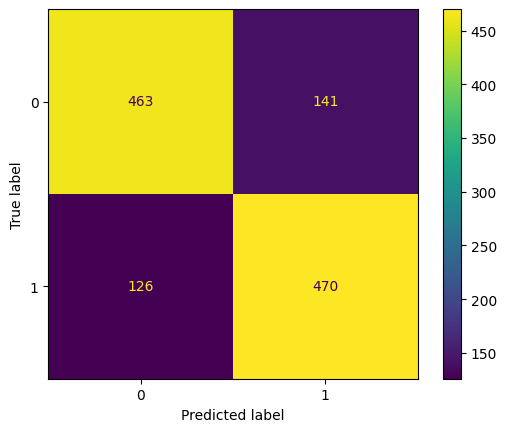

In [76]:
# Mostrar Matriz de Confusão
confusion_matrix_model = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix_model)

disp.plot()

### Otimizar Hiperparâmetros

In [123]:
# Ajustar hiperparâmetros com Optuna

# Hiperparâmetro penalty
# Regularalização controla a complexidade do modelo, reduzindo overfitting
# L1 (Lasso) é útil para fins de Feature Selection e para modelo esparsos. Soma dos valores absolutos dos coeficientes
# L2 (Rigde) é útil para evitar o overfitting, principalmente quando há multicolinearidade. Soma dos quadrados dos coeficientes

# Hiperparâmetro C
# Valores maiores de C, indica uma regularização mais fraca
# Valores menores de C, indica uma regularização mais forte

def lr_optuna(trial):
  penalty = trial.suggest_categorical('penalty', ['l1', 'l2'])
  c_values = trial.suggest_categorical('c',[100, 10, 1.0, 0.1, 0.01])
  
  # Treinar modelo
  model_lr_optuna = LogisticRegression(solver='liblinear', penalty=penalty, C=c_values)
  model_lr_optuna.fit(X_train, y_train)

  # Retorna a Decision Function
  y_decision_optuna = model_lr_optuna.decision_function(X_test)

  # Calcular Curva ROC
  fpr, tpr, threshoulds = roc_curve(y_test, y_decision_optuna)

  # Calcular AUC
  roc_auc_optuna = auc(fpr, tpr)

  # Retornar Predição
  y_pred_optuna = model_lr_optuna.predict(X_test)

  # Calcular F1 Score
  f1_score_optuna = f1_score(y_test, y_pred_optuna, average='macro')

  # Calcular BCE (Binary Cross Entropy - Erro)
  log_loss_optuna = log_loss(y_test, y_pred_optuna)

  return roc_auc_optuna, f1_score_optuna, log_loss_optuna


In [125]:
# Criação do Estudo e Rodar Otimizador
search_space = {'penalty':['l1', 'l2'], 'c':[100, 10, 1.0, 0.1, 0.01]}
sampler = optuna.samplers.GridSampler(search_space=search_space)
estudy_lr = optuna.create_study(directions=['maximize', 'maximize', 'minimize'])

estudy_lr.optimize(lr_optuna, n_trials=20)

[I 2025-03-17 17:35:09,527] A new study created in memory with name: no-name-263f2e7b-b95b-4f60-b939-36a94a420339
[I 2025-03-17 17:35:09,558] Trial 0 finished with values: [0.8414207298102138, 0.7774924285618052, 8.019712879078565] and parameters: {'penalty': 'l1', 'c': 100}.
[I 2025-03-17 17:35:09,580] Trial 1 finished with values: [0.8414207298102138, 0.7774924285618052, 8.019712879078565] and parameters: {'penalty': 'l1', 'c': 100}.
[I 2025-03-17 17:35:09,598] Trial 2 finished with values: [0.8408595937597227, 0.7758257051802457, 8.079785634727095] and parameters: {'penalty': 'l1', 'c': 0.1}.
[I 2025-03-17 17:35:09,617] Trial 3 finished with values: [0.8383150362238322, 0.7657746143303981, 8.440222168618266] and parameters: {'penalty': 'l2', 'c': 0.01}.
[I 2025-03-17 17:35:09,633] Trial 4 finished with values: [0.8408623716609627, 0.7758257051802457, 8.079785634727095] and parameters: {'penalty': 'l1', 'c': 0.1}.
[I 2025-03-17 17:35:09,649] Trial 5 finished with values: [0.838315036

In [131]:
# Mostrar melhor resultado e melhor conjunto de hiperparâmetros
best_trail = max(estudy_lr.best_trials, key=lambda t:t.values[1])

print(f'Trial com melhor AUC e F1 e menor BCE:')
print(f'\tnumber: {best_trail.number}')
print(f'\tnumber: {best_trail.params}')
print(f'\tnumber: {best_trail.values}')


Trial com melhor AUC e F1 e menor BCE:
	number: 7
	number: {'penalty': 'l2', 'c': 0.1}
	number: [0.84122349882217, 0.7774998454860038, 8.019712879078567]


In [133]:
# Mostrar Chart com Trials do Estudo

fig = optuna.visualization.plot_pareto_front(estudy_lr)

fig.show()

In [140]:
# Comparação entre melhor resultado da otimização e baseline - AUC

print(f'AUC: baseline={roc_auc} optuna={best_trail.values[0]}')

AUC: baseline=0.8414568425263345 optuna=0.84122349882217


In [139]:
# Comparação entre melhor resultado da otimização e baseline - F1 Score

print(f'F1: baseline={f1_score_baseline} optuna={best_trail.values[1]}')

F1: baseline=0.7787903893951947 optuna=0.7774998454860038


In [138]:
# Comparação entre melhor resultado da otimização e baseline - BCE

print(f'BCE: baseline={log_loss(y_test, y_pred)} optuna={best_trail.values[2]}')

BCE: baseline=8.019712879078565 optuna=8.019712879078567


### Verificar métricas com Threshoulds diferentes

In [ ]:
# Fazer um loop e apresentar o  F1 Score para cada Threshold

thresholds_list = [0.55, 0.60, 0.65, 0.70, 0.75, 0.80, 0.85, 0.90]

result_list = {'cenario': [], 'resultado': []}

result_list['cenario'].append('baseline')
result_list['resultado'].append(f1_score_baseline)

result_list['cenario'].append('optuna')
result_list['resultado'].append(best_trail.values[1])

for threshold_new in thresholds_list:
  y_pred_threshold = (model_lr.predict_proba(X_test)[:,1] >= threshold_new).astype(int)
  f1_score_threshold = f1_score(y_test, y_pred_threshold, average='macro')
  result_list['cenario'].append(str(threshold_new))
  result_list['resultado'].append(f1_score_threshold)

In [143]:
# Criar Dataframe com Resultados
df_threshold_results = pd.DataFrame(result_list)

In [144]:
df_threshold_results

,cenario,resultado
0,baseline,0.778790
1,optuna,0.777500
2,0.55,0.758622
3,0.6,0.749562
4,0.65,0.720718
5,0.7,0.688131
6,0.75,0.656890
7,0.8,0.614942
8,0.85,0.548762
9,0.9,0.443542


In [145]:
# Apresentar Resultados dos F1 Scores

px.line(df_threshold_results, x="cenario", y='resultado')

### Salvar Modelo

In [ ]:
import joblib

# Salvar Modelo
joblib.dump(model_lr, 'fruit_quality_model.pkl')

['fruit_quality_model.pkl']